<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
df = pd.read_csv('data.csv', sep=';')
print(df.shape)

(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
df = pd.read_csv('data.csv', sep=';')
# Просмотр первых 5 строк
print(df.head())
# Просмотр последних 5 строк
print(df.tail())


                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
df = pd.read_csv('data.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
df = pd.read_csv('data.csv', sep=';')
# Проверяем наличие пропусков
missing = df.isna().sum()
# Выводим только те признаки, где есть пропуски
cols_with_na = missing[missing > 0]
print(cols_with_na)


Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [6]:
df = pd.read_csv('data.csv', sep=';')
# Основная статистика по числовым столбцам
print(df.describe())


                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
df = pd.read_csv('data.csv', sep=';')

def extract_education(text):
    text = text.lower()
    first_words = " ".join(text.split()[:3])  # берём только первые 3 слова

    if 'неоконченное высшее' in first_words:
        return 'неоконченное высшее'
    elif 'высшее' in first_words:
        return 'высшее'
    elif 'среднее специальное' in first_words:
        return 'среднее специальное'
    elif 'среднее' in first_words:
        return 'среднее'
    else:
        return None
df['Образование'] = df['Образование и ВУЗ'].apply(extract_education)
print(df['Образование'].value_counts())
count_medium = (df['Образование'] == 'среднее').sum()
print(count_medium)



Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64
559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
df = pd.read_csv('data.csv', sep=';')
# Разделяем строку на три части: пол, возраст, дата рождения
df[['Пол', 'Возраст_строка', 'Дата рождения']] = df['Пол, возраст'].str.split(' , ', expand=True)
df['Пол'] = df['Пол'].str.strip().replace({'Мужчина': 'М', 'Женщина': 'Ж'})
df['Возраст'] = df['Возраст_строка'].str.extract(r'(\d+)').astype(int)
df.drop(columns=['Пол, возраст', 'Возраст_строка', 'Дата рождения'], inplace=True)
percent_women = (df['Пол'].value_counts(normalize=True)['Ж'] * 100).round(2)
print(percent_women)
mean_age = df['Возраст'].mean().round(1)
print(mean_age)




19.07
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
def exp_to_months(text):
    if pd.isna(text) or 'не указано' in text.lower():
        return np.nan

    text = text.lower()
    years = 0
    months = 0

    if 'год' in text:
        parts = text.split('год')[0].split()
        for p in reversed(parts):
            if p.isdigit():
                years = int(p)
                break

    if 'месяц' in text:
        parts = text.split('месяц')[0].split()
        for p in reversed(parts):
            if p.isdigit():
                months = int(p)
                break

    return years * 12 + months if (years + months) > 0 else np.nan

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(exp_to_months)
median_exp = df['Опыт работы (месяц)'].median()
print("Медианный опыт работы (в месяцах):", median_exp)




Медианный опыт работы (в месяцах): 27.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [14]:
# список городов-миллионников
million_cities = [
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
    'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
]

def parse_city_block(text):
    if pd.isna(text):
        return pd.Series(["другие", False, False])

    original = text
    text = text.lower()

    parts = [p.strip() for p in text.split(",")]

    # 1. --- Город ---
    raw_city = parts[0].capitalize()

    if raw_city == "Москва":
        city = "Москва"
    elif raw_city == "Санкт-петербург":
        city = "Санкт-Петербург"
    elif raw_city in million_cities:
        city = "город-миллионник"
    else:
        city = "другие"

    # 2. --- Готовность к переезду ---
    relocation = False
    for p in parts:
        if "переезд" in p:
            if "не готов" in p or "не готова" in p:
                relocation = False
            else:
                relocation = True
        if "хочу переехать" in p:
            relocation = True

    # 3. --- Готовность к командировкам ---
    business = False
    any_info = False
    for p in parts:
        if "командиров" in p:
            any_info = True
            if "не готов" in p or "не готова" in p:
                business = False
            else:
                business = True
    if not any_info:
        business = False

    return pd.Series([city, relocation, business])

# создаём столбцы
df[["Город", "Готовность к переезду", "Готовность к командировкам"]] = \
    df["Город, переезд, командировки"].apply(parse_city_block)

# удаляем старый столбец
df.drop(columns=["Город, переезд, командировки"], inplace=True)
m1 = round((df["Город"] == "Санкт-Петербург").mean() * 100)
print(m1)
m2 = round((df["Готовность к переезду"] & df["Готовность к командировкам"]).mean() * 100)
print(m2)

11
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [12]:
employment_categories = [
    "полная занятость",
    "частичная занятость",
    "проектная работа",
    "волонтерство",
    "стажировка"
]

schedule_categories = [
    "полный день",
    "сменный график",
    "гибкий график",
    "удалённая работа",
    "вахтовый метод"
]
def make_flags(text, categories):
    if pd.isna(text):
        text = ""
    text = text.lower()
    return [cat in text for cat in categories]
emp_flags = df["Занятость"].apply(lambda x: make_flags(x, employment_categories))
emp_df = pd.DataFrame(emp_flags.tolist(), columns=[f"Занятость: {c}" for c in employment_categories])
sch_flags = df["График"].apply(lambda x: make_flags(x, schedule_categories))
sch_df = pd.DataFrame(sch_flags.tolist(), columns=[f"График: {c}" for c in schedule_categories])
df = pd.concat([df, emp_df, sch_df], axis=1)
df.drop(columns=["Занятость", "График"], inplace=True)
count_proj_vol = df["Занятость: проектная работа"].sum() & df["Занятость: волонтерство"].sum()
count_proj_vol = ((df["Занятость: проектная работа"]) &
                  (df["Занятость: волонтерство"])).sum()
print(count_proj_vol)
count_vahta_gibkiy = ((df["График: вахтовый метод"]) &
                      (df["График: гибкий график"])).sum()

print(count_vahta_gibkiy)


436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [19]:
currency_df = pd.read_csv("exchange_rates.csv", parse_dates=["date"], dayfirst=True)
currency_df["date"] = currency_df["date"].dt.date
df["date"] = pd.to_datetime(df["Обновление резюме"], format="%d.%m.%Y %H:%M").dt.date
def parse_salary(s):
    if pd.isna(s):
        return pd.Series([np.nan, np.nan])

    parts = s.split()
    amount = int(parts[0])
    curr = parts[-1].replace(".", "")
    return pd.Series([amount, curr])

df[["salary_amount", "salary_curr"]] = df["ЗП"].apply(parse_salary)
currency_map = {
    "руб": ("RUB", 1),
    "грн": ("UAH", 10),
    "USD": ("USD", 1),
    "EUR": ("EUR", 1),
    "белруб": ("BYN", 1),
    "KGS": ("KGS", 10),
    "сум": ("UZS", 10000),
    "AZN": ("AZN", 1),
    "KZT": ("KZT", 100)
}

df["ISO"] = df["salary_curr"].apply(lambda x: currency_map[x][0] if x in currency_map else np.nan)
df["prop"] = df["salary_curr"].apply(lambda x: currency_map[x][1] if x in currency_map else np.nan)
merged = df.merge(
    currency_df,
    how="left",
    left_on=["date", "ISO"],
    right_on=["date", "currency"]
)
merged["close"] = merged["close"].fillna(1)
merged["ЗП (руб)"] = merged["salary_amount"] * merged["close"] / merged["prop"]
result = int(round(merged["ЗП (руб)"].median() / 1000))
print(result)


C:\Users\shida\AppData\Local\Temp\ipykernel_24228\2336624091.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  currency_df = pd.read_csv("exchange_rates.csv", parse_dates=["date"], dayfirst=True)


59


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

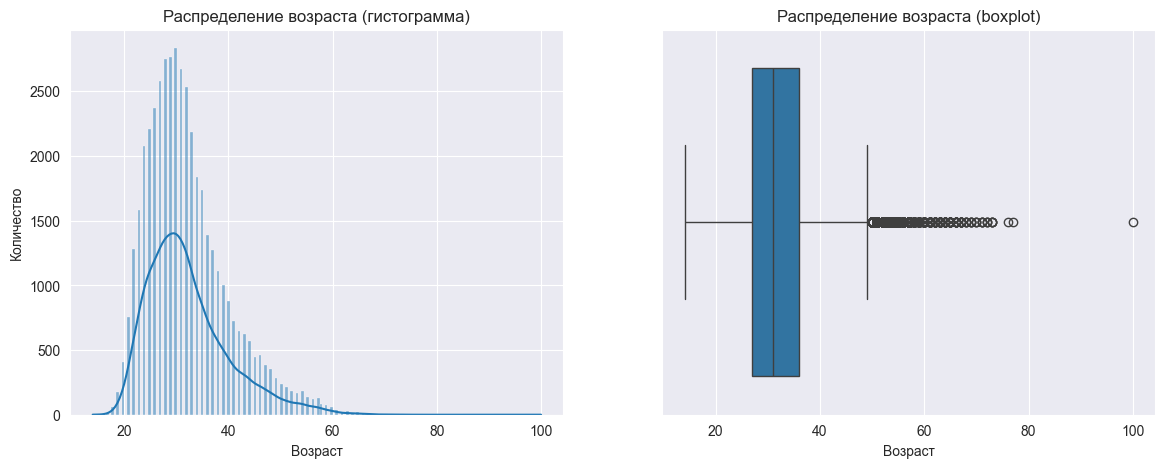

Мода возраста: 30.0
Минимальный возраст: 14.0
Максимальный возраст: 100.0
IQR: 9.0
Границы нормального диапазона: 13.5 - 49.5
Количество аномалий: 1774
Примеры аномальных значений возраста: [60. 59. 53. 54. 62. 72. 61. 50. 58. 57.]


In [16]:
df = pd.read_csv("data.csv", sep=';')
df["Возраст"] = df["Пол, возраст"].str.split(" , ").str[1]
df["Возраст"] = df["Возраст"].str.extract(r"(\d+)")
df["Возраст"] = df["Возраст"].astype(float)

plt.figure(figsize=(14,5))
# --- Гистограмма ---
plt.subplot(1, 2, 1)
sns.histplot(df["Возраст"], kde=True)
plt.title("Распределение возраста (гистограмма)")
plt.xlabel("Возраст")
plt.ylabel("Количество")

# --- Boxplot ---
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Возраст"])
plt.title("Распределение возраста (boxplot)")
plt.xlabel("Возраст")

plt.show()

# --- Основные характеристики ---
mode_age = df["Возраст"].mode()[0]
min_age = df["Возраст"].min()
max_age = df["Возраст"].max()
q1 = df["Возраст"].quantile(0.25)
q3 = df["Возраст"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Мода возраста:", mode_age)
print("Минимальный возраст:", min_age)
print("Максимальный возраст:", max_age)
print("IQR:", iqr)
print("Границы нормального диапазона:", lower_bound, "-", upper_bound)

# Аномалии
outliers = df[(df["Возраст"] < lower_bound) | (df["Возраст"] > upper_bound)]
print("Количество аномалий:", len(outliers))
print("Примеры аномальных значений возраста:", outliers["Возраст"].unique()[:10])

fig = px.histogram(df, x="Возраст", nbins=20, marginal="box",
                   title="Распределение возраста")
fig.write_html("plots/age_distribution.html")



Мода — 30 лет, то есть большинство соискателей около 30 лет.

Большинство резюме сосредоточено примерно в диапазоне 20–40 лет

Верхняя граница нормального диапазона (по boxplot) — ~49.5 лет. Соответственно, значения старше ~50 лет считаются выбросами.(Число таких аномалий — 1774)

Основной контингент резюме: 25–40 лет, с пиком около 30 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


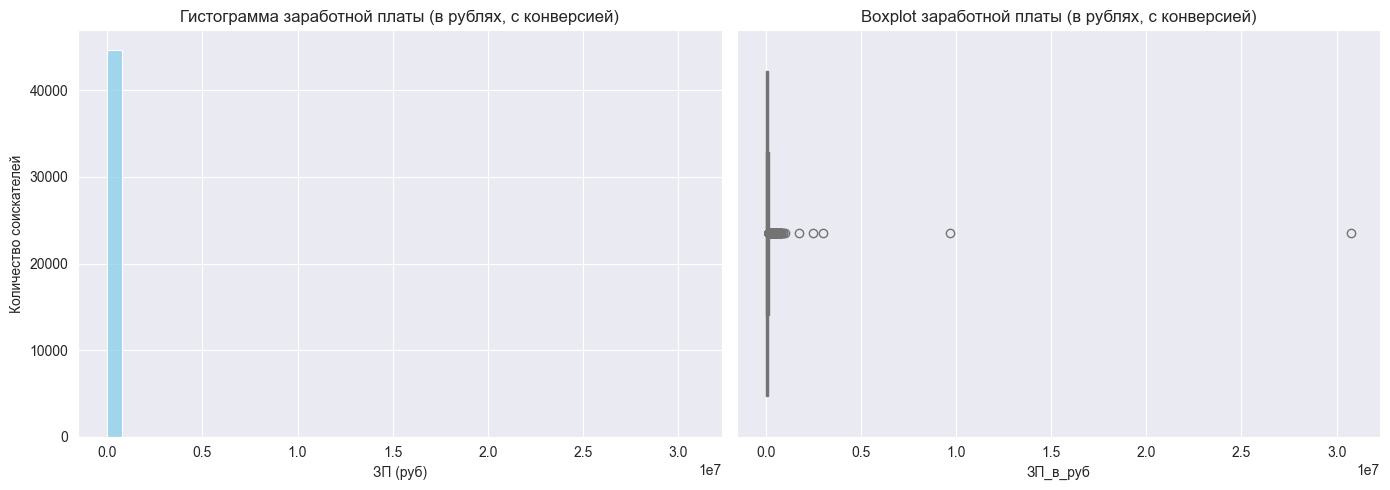

Минимальная зарплата: 1 руб.
Максимальная зарплата: 30,742,000 руб.
Интервал большинства соискателей: 36,583 – 95,000 руб.
Количество аномалий (по IQR): 2821
Топ-5 самых больших зарплат:
6931     30742000.0
39191     9708000.0
28253     3000000.0
43134     2500000.0
41924     1750000.0
Name: ЗП_в_руб, dtype: float64
Количество соискателей, требующих ЗП > 1 000 000 руб: 5


In [17]:
RATE_USD_RUB = 80.9
RATE_KZT_RUB = 0.154
RATE_EUR_RUB = 88.0
RATE_UAH_RUB = 2.2

def parse_salary_to_rub(sal):
    if pd.isna(sal):
        return np.nan
    s = str(sal).strip()
    # определяем валюту по символам или словам
    if "руб" in s.lower() or "р." in s.lower() or "rub" in s.lower():
        # рубли — просто очистка цифр
        cleaned = "".join([c if c.isdigit() else " " for c in s])
        nums = cleaned.split()
        if len(nums)==0:
            return np.nan
        return float(nums[0])
    elif "usd" in s.lower() or "$" in s:
        cleaned = "".join([c if c.isdigit() else " " for c in s])
        nums = cleaned.split()
        if len(nums)==0:
            return np.nan
        return float(nums[0]) * RATE_USD_RUB
    elif "kzt" in s.lower() or "₸" in s:
        cleaned = "".join([c if c.isdigit() else " " for c in s])
        nums = cleaned.split()
        if len(nums)==0:
            return np.nan
        return float(nums[0]) * RATE_KZT_RUB
    elif "eur" in s.lower() or "€" in s:
        cleaned = "".join([c if c.isdigit() else " " for c in s])
        nums = cleaned.split()
        if len(nums)==0:
            return np.nan
        return float(nums[0]) * RATE_EUR_RUB
    elif "uah" in s.lower() or "грн" in s.lower():
        cleaned = "".join([c if c.isdigit() else " " for c in s])
        nums = cleaned.split()
        if len(nums)==0:
            return np.nan
        return float(nums[0]) * RATE_UAH_RUB
    else:
        return np.nan

df["ЗП_в_руб"] = df["ЗП"].apply(parse_salary_to_rub)

df_salary = df.dropna(subset=["ЗП_в_руб"])

# Статистики
min_salary = df_salary["ЗП_в_руб"].min()
max_salary = df_salary["ЗП_в_руб"].max()

q1 = df_salary["ЗП_в_руб"].quantile(0.25)
q3 = df_salary["ЗП_в_руб"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers = df_salary[(df_salary["ЗП_в_руб"] < lower_bound) | (df_salary["ЗП_в_руб"] > upper_bound)]

# Построение графиков
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df_salary["ЗП_в_руб"], bins=40, color="skyblue")
plt.title("Гистограмма заработной платы (в рублях, с конверсией)")
plt.xlabel("ЗП (руб)")
plt.ylabel("Количество соискателей")

plt.subplot(1,2,2)
sns.boxplot(x=df_salary["ЗП_в_руб"], color="lightgreen")
plt.title("Boxplot заработной платы (в рублях, с конверсией)")

plt.tight_layout()
plt.show()

# Вывод результатов
print(f"Минимальная зарплата: {min_salary:,.0f} руб.")
print(f"Максимальная зарплата: {max_salary:,.0f} руб.")
print(f"Интервал большинства соискателей: {q1:,.0f} – {q3:,.0f} руб.")
print(f"Количество аномалий (по IQR): {len(outliers)}")
print("Топ-5 самых больших зарплат:")
print(df_salary["ЗП_в_руб"].sort_values(ascending=False).head(5))

above_million = (df_salary["ЗП_в_руб"] > 1_000_000).sum()
print(f"Количество соискателей, требующих ЗП > 1 000 000 руб: {above_million}")

fig = px.histogram(df_salary, x="ЗП_в_руб", nbins=40, marginal="box",
                   title="Распределение зарплаты (в рублях, с конверсией)",
                   labels={"ЗП_в_руб": "ЗП (руб)"}, color_discrete_sequence=["skyblue"])
fig.write_html("plots/salary_distribution.html")


1)Большинство соискателей указывают ЗП в диапазоне примерно 35 000 – 95 000 руб.

2)Имеется большое количество аномальных значений

3)Минимальное значение — 1 руб,что явно ошибка

4)Гистограмма показывает, что данные сильно загрязнены выбросами

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

C:\Users\shida\AppData\Local\Temp\ipykernel_18708\2063550642.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



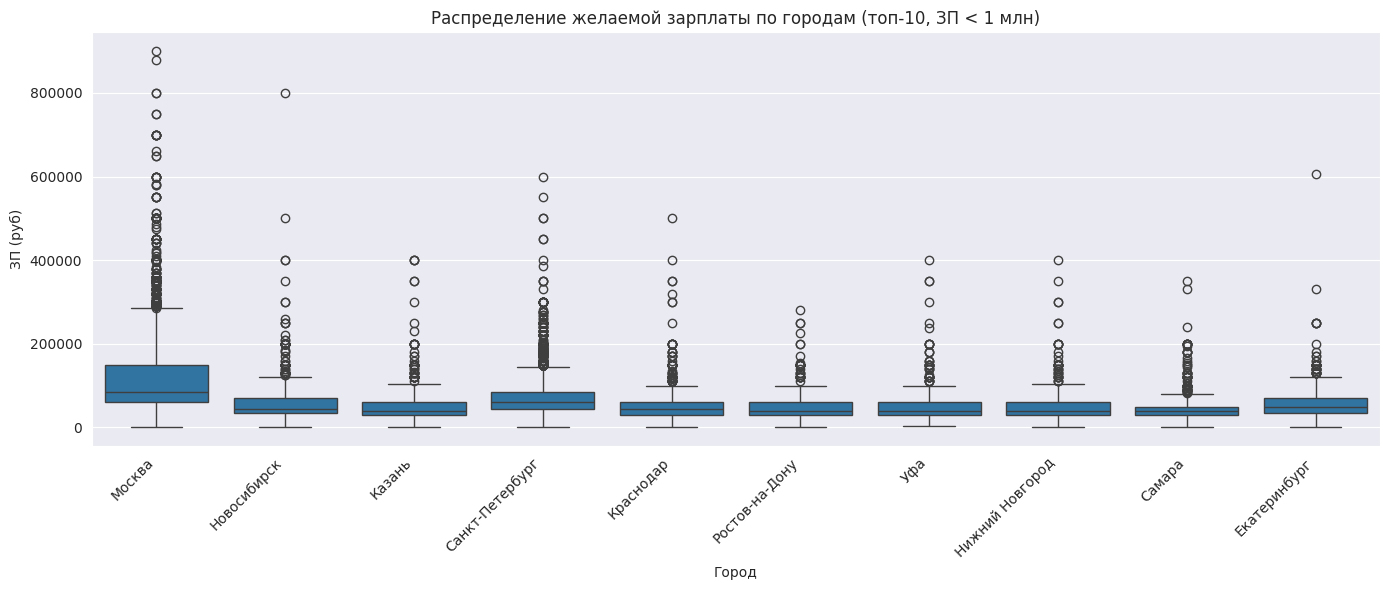

Медианные ЗП по городам (топ-10):
Город
Москва             85000.0
Санкт-Петербург    60000.0
Екатеринбург       50000.0
Новосибирск        45000.0
Краснодар          45000.0
Казань             40000.0
Нижний Новгород    40000.0
Ростов-на-Дону     40000.0
Самара             40000.0
Уфа                40000.0
Name: ЗП_в_руб, dtype: float64

Размах ЗП по городам (топ-10):
Город
Москва             899999.0
Новосибирск        799000.0
Екатеринбург       604900.0
Санкт-Петербург    599999.0
Краснодар          499800.0
Казань             399970.0
Нижний Новгород    399950.0
Уфа                397000.0
Самара             349001.0
Ростов-на-Дону     279880.0
Name: ЗП_в_руб, dtype: float64
Наибольшая желаемая ЗП зафиксирована в городе: Москва — 900000 руб.


In [18]:

df = pd.read_csv("data.csv", sep=';')

plt.rcParams['font.family'] = 'DejaVu Sans'

def parse_salary(s):
    if pd.isna(s):
        return np.nan, np.nan
    s = s.replace(" ", "").lower()
    if "руб" in s:
        currency = "RUB"
    elif "usd" in s:
        currency = "USD"
    elif "eur" in s:
        currency = "EUR"
    elif "kzt" in s:
        currency = "KZT"
    elif "грн" in s or "uah" in s:
        currency = "UAH"
    else:
        currency = np.nan
    try:
        value = float(''.join([c for c in s if c.isdigit()]))
    except:
        value = np.nan
    return value, currency

df[['ЗП_число','Валюта']] = df['ЗП'].apply(lambda x: pd.Series(parse_salary(x)))

currency_rates = {'RUB': 1, 'USD': 100, 'EUR': 110, 'KZT': 0.18, 'UAH': 3}
df['ЗП_в_руб'] = df['ЗП_число'] * df['Валюта'].map(currency_rates)

df_filtered = df[df['ЗП_в_руб'] < 1_000_000]

df_filtered['Город'] = df_filtered['Город, переезд, командировки'].str.split(',').str[0].str.strip()

city_counts = df_filtered['Город'].value_counts()
top10_cities = city_counts.head(10).index
df_top10 = df_filtered[df_filtered['Город'].isin(top10_cities)]

plt.figure(figsize=(14,6))
sns.boxplot(x='Город', y='ЗП_в_руб', data=df_top10)
plt.xticks(rotation=45, ha='right')
plt.title("Распределение желаемой зарплаты по городам (топ-10, ЗП < 1 млн)")
plt.xlabel("Город")
plt.ylabel("ЗП (руб)")
plt.tight_layout()
plt.show()

median_by_city = df_top10.groupby('Город')['ЗП_в_руб'].median().sort_values(ascending=False)
range_by_city = df_top10.groupby('Город')['ЗП_в_руб'].apply(lambda x: x.max() - x.min()).sort_values(ascending=False)

print("Медианные ЗП по городам (топ-10):")
print(median_by_city)
print("\nРазмах ЗП по городам (топ-10):")
print(range_by_city)

max_salary = df_top10.groupby('Город')['ЗП_в_руб'].max().sort_values(ascending=False)
top_city = max_salary.idxmax()
top_salary = max_salary.max()
print(f"Наибольшая желаемая ЗП зафиксирована в городе: {top_city} — {top_salary:.0f} руб.")

fig = px.box(df_top10, x='Город', y='ЗП_в_руб',
             title="Распределение желаемой зарплаты по городам (топ-10, ЗП < 1 млн)",
             labels={"ЗП_в_руб":"ЗП (руб)", "Город":"Город"},
             color_discrete_sequence=["lightgreen"])

fig.update_layout(xaxis_tickangle=45)
fig.write_html("plots/salary_by_city.html")

1)Медианная зарплата в Москве самая высокая

2)Большинство региональных городов имеют медиану 40–50

3)В региональных городах распределения «плотные», выбросов мало.




6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

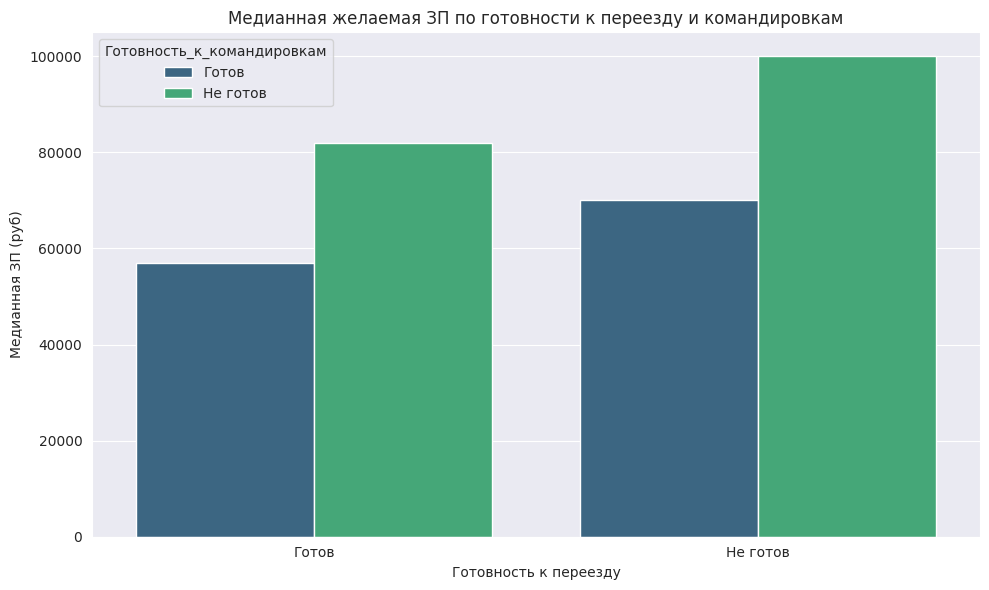

Медиана: 55000.0
В тысячах: 55


In [19]:
df = pd.read_csv("data.csv", sep=';')

plt.rcParams['font.family'] = 'DejaVu Sans'

def parse_salary(s):
    if pd.isna(s):
        return np.nan, np.nan
    s = s.lower().replace(" ", "")

    if "руб" in s:
        cur = "RUB"
    elif "usd" in s:
        cur = "USD"
    elif "eur" in s:
        cur = "EUR"
    elif "kzt" in s:
        cur = "KZT"
    elif "грн" in s or "uah" in s:
        cur = "UAH"
    else:
        cur = np.nan

    digits = "".join([c for c in s if c.isdigit()])
    value = float(digits) if digits else np.nan

    return value, cur

df[['ЗП_число','Валюта']] = df['ЗП'].apply(lambda x: pd.Series(parse_salary(x)))

currency_rates = {"RUB":1, "USD":100, "EUR":110, "KZT":0.18, "UAH":3}
df["ЗП_в_руб"] = df["ЗП_число"] * df["Валюта"].map(currency_rates)

df_filtered = df[df["ЗП_в_руб"] < 1_000_000].copy()

text = df_filtered["Город, переезд, командировки"].str.lower().fillna("")

df_filtered["Готовность_к_переезду"] = np.where(
    text.str.contains("переезд|переезж"),
    "Готов",
    "Не готов"
)

df_filtered["Готовность_к_командировкам"] = np.where(
    text.str.contains("командир|командировк"),
    "Готов",
    "Не готов"
)

median_table = (
    df_filtered
    .groupby(["Готовность_к_переезду", "Готовность_к_командировкам"])["ЗП_в_руб"]
    .median()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=median_table,
    x="Готовность_к_переезду",
    y="ЗП_в_руб",
    hue="Готовность_к_командировкам",
    palette="viridis"
)

plt.title("Медианная желаемая ЗП по готовности к переезду и командировкам")
plt.xlabel("Готовность к переезду")
plt.ylabel("Медианная ЗП (руб)")
plt.tight_layout()
plt.show()

col = df["Город, переезд, командировки"].str.lower()

# Готовность к переезду: любой вариант "готов(а) к переезду"
cond_move = col.str.contains("готов к переезду") | col.str.contains("готова к переезду")

# Готовность к командировкам: любой вариант "готов(а) к командировкам" (включая редкие)
cond_trip = col.str.contains("готов к командировкам") | col.str.contains("готова к командировкам")

# Итоговый фильтр
mask = cond_move & cond_trip
median_salary = df.loc[mask, "ЗП_в_руб"].median()
print("Медиана:", median_salary)
print("В тысячах:", round(median_salary/1000))

fig = px.bar(
    median_table,
    x="Готовность_к_переезду",
    y="ЗП_в_руб",
    color="Готовность_к_командировкам",
    barmode="group",
    title="Медианная желаемая ЗП по готовности к переезду и командировкам",
    labels={"ЗП_в_руб":"Медианная ЗП (руб)", "Готовность_к_переезду":"Готовность к переезду"},
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.write_html("plots/median_salary_relocation_business_trip.html")





In [ ]:
Чем выше медианная ЗП, тем больше готовность к перезду и командировкам

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

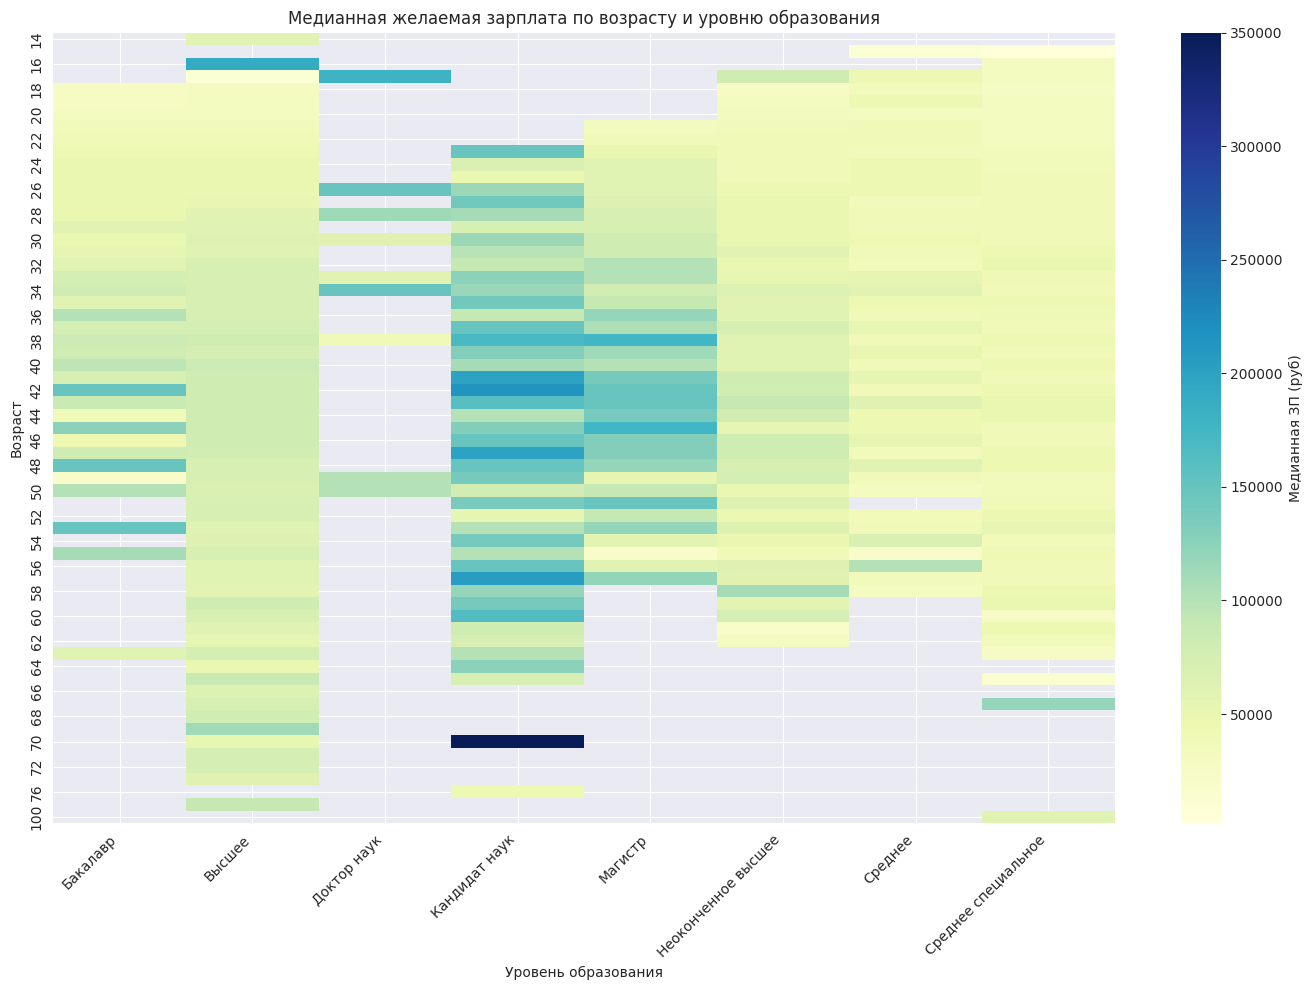

In [20]:
df = pd.read_csv("data.csv", sep=';')

plt.rcParams['font.family'] = 'DejaVu Sans'

def extract_education(text):
    t = str(text).lower()

    if "кандидат" in t:
        return "Кандидат наук"
    if "доктор" in t:
        return "Доктор наук"
    if "магистр" in t:
        return "Магистр"
    if "бакалавр" in t:
        return "Бакалавр"
    if "неоконченное высшее" in t:
        return "Неоконченное высшее"
    if "высшее" in t:
        return "Высшее"
    if "среднее специальное" in t:
        return "Среднее специальное"
    if "среднее" in t:
        return "Среднее"
    return "Другое"

df["Образование_уровень"] = df["Образование и ВУЗ"].apply(extract_education)

def parse_salary(s):
    if pd.isna(s):
        return np.nan, np.nan

    s = str(s).lower().replace(" ", "")

    if "руб" in s:
        currency = "RUB"
    elif "usd" in s:
        currency = "USD"
    elif "eur" in s:
        currency = "EUR"
    elif "kzt" in s:
        currency = "KZT"
    elif "грн" in s or "uah" in s:
        currency = "UAH"
    else:
        currency = np.nan

    digits = ""
    for ch in s:
        if ch.isdigit():
            digits += ch

    value = float(digits) if digits else np.nan
    return value, currency


df[['ЗП_число', 'Валюта']] = df['ЗП'].apply(lambda x: pd.Series(parse_salary(x)))


currency_rates = {'RUB': 1, 'USD': 100, 'EUR': 110, 'KZT': 0.18, 'UAH': 3}
df['ЗП_в_руб'] = df['ЗП_число'] * df['Валюта'].map(currency_rates)

def extract_age(text):
    if pd.isna(text):
        return np.nan
    text = str(text)
    parts = text.split()

    for p in parts:
        if p.isdigit():
            return int(p)
    return np.nan

df["Возраст"] = df["Пол, возраст"].apply(extract_age)


# ===== 7. Строим сводную таблицу (без фильтрации ЗП) =====
pivot = df.pivot_table(
    index="Возраст",
    columns="Образование_уровень",
    values="ЗП_в_руб",
    aggfunc="median"
)


# ===== 8. Тепловая карта =====
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot,
    cmap="YlGnBu",
    annot=False,     # включи True, если нужны цифры
    cbar_kws={'label': 'Медианная ЗП (руб)'}
)

plt.title("Медианная желаемая зарплата по возрасту и уровню образования")
plt.xlabel("Уровень образования")
plt.ylabel("Возраст")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig = px.imshow(
    pivot,
    labels=dict(x="Уровень образования", y="Возраст", color="Медианная ЗП (руб)"),
    x=pivot.columns,
    y=pivot.index,
    color_continuous_scale="YlGnBu",
    aspect="auto"
)

fig.update_layout(title="Медианная желаемая зарплата по возрасту и уровню образования")
fig.write_html("plots/heatmap_salary_age_education.html")


1)Чем выше образование, тем выше желаемая зарплата

2)Кандидат наук и доктор наук — самые высокие ожидания

3)Возраст 30–45 лет — пик по стоимости труда

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

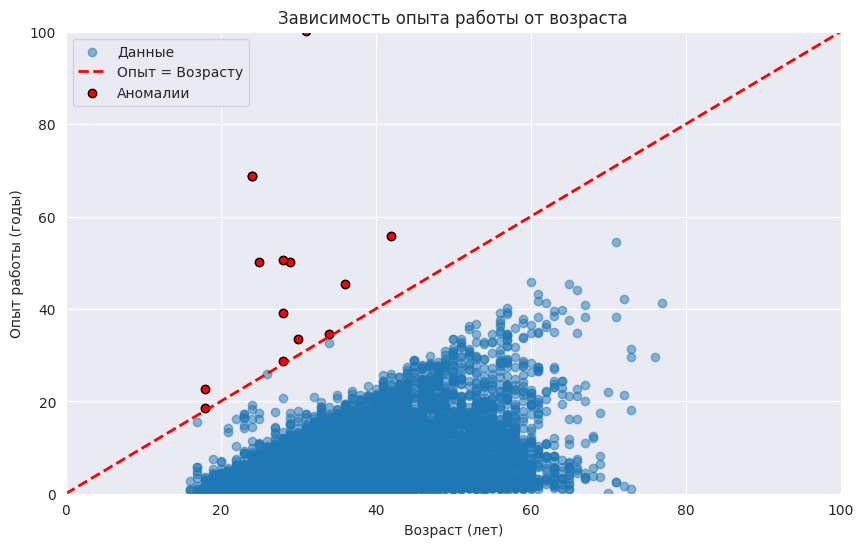

Всего записей: 44744
Записей с валидным возрастом: 44740
Найдено аномалий: 593

Статистика по возрасту:
count    44740.000000
mean        32.196401
std          7.922371
min         16.000000
25%         27.000000
50%         31.000000
75%         36.000000
max         77.000000
Name: Возраст, dtype: float64

Статистика по опыту работы (в годах):
count    44740.000000
mean        30.027770
std        229.855180
min          0.000000
25%          1.583333
50%          2.500000
75%          4.833333
max       8000.416667
Name: Опыт работы (годы), dtype: float64


In [24]:
df = pd.read_csv("data.csv", sep=';')

def extract_age(age_gender_str):
    if pd.isna(age_gender_str):
        return None

    age_gender_str = str(age_gender_str)

    parts = age_gender_str.replace(',', ' ').split()

    for part in parts:
        if part.isdigit():
            age = int(part)
            if 16 <= age <= 80:
                return age

    return None

def experience_to_years(exp_str):
    if pd.isna(exp_str):
        return 0

    exp_str = str(exp_str).lower()

    years = 0
    months = 0

    words = exp_str.split()

    for i, word in enumerate(words):
        if word.isdigit():
            num = int(word)
            if i + 1 < len(words):
                next_word = words[i + 1]
                if any(year_indicator in next_word for year_indicator in ['лет', 'год', 'года']):
                    years = num
                elif any(month_indicator in next_word for month_indicator in ['месяц', 'месяца', 'месяцев']):
                    months = num

    if years == 0 and months == 0:
        for word in words:
            if word.isdigit():
                num = int(word)
                if num > 20:
                    months = num
                else:
                    years = num
                break

    return years + months / 12

# Извлекаем возраст и опыт работы
df['Возраст'] = df['Пол, возраст'].apply(extract_age)
df['Опыт работы (годы)'] = df['Опыт работы'].apply(experience_to_years)

df_clean = df.dropna(subset=['Возраст'])

# Создание диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Возраст'], df_clean['Опыт работы (годы)'], alpha=0.5, label='Данные')

# Построение прямой y = x (опыт равен возрасту)
plt.plot([0, 100], [0, 100], 'r--', label='Опыт = Возрасту', linewidth=2)

# Выделение аномалий (опыт >= возраст)
anomalies = df_clean[df_clean['Опыт работы (годы)'] >= df_clean['Возраст']]
plt.scatter(anomalies['Возраст'], anomalies['Опыт работы (годы)'],
            color='red', label='Аномалии', edgecolors='black')

# Настройка графика
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('Возраст (лет)')
plt.ylabel('Опыт работы (годы)')
plt.title('Зависимость опыта работы от возраста')
plt.legend()
plt.grid(True)
plt.show()

# Дополнительно: вывод информации об аномалиях
print(f"Всего записей: {len(df)}")
print(f"Записей с валидным возрастом: {len(df_clean)}")
print(f"Найдено аномалий: {len(anomalies)}")

# Проверка распределения возрастов и опыта
print(f"\nСтатистика по возрасту:")
print(df_clean['Возраст'].describe())

print(f"\nСтатистика по опыту работы (в годах):")
print(df_clean['Опыт работы (годы)'].describe())

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_clean['Возраст'],
    y=df_clean['Опыт работы (годы)'],
    mode='markers',
    name='Данные',
    marker=dict(color='blue', opacity=0.5)
))

fig.add_trace(go.Scatter(
    x=anomalies['Возраст'],
    y=anomalies['Опыт работы (годы)'],
    mode='markers',
    name='Аномалии',
    marker=dict(color='red', size=10, line=dict(width=1, color='black'))
))

fig.add_trace(go.Scatter(
    x=np.arange(0,101),
    y=np.arange(0,101),
    mode='lines',
    name='Опыт = Возрасту',
    line=dict(color='green', dash='dash', width=2)
))

fig.update_layout(
    title='Зависимость опыта работы от возраста',
    xaxis_title='Возраст (лет)',
    yaxis_title='Опыт работы (годы)',
    xaxis=dict(range=[0,100]),
    yaxis=dict(range=[0,100]),
    legend=dict(x=0.02, y=0.98),
    template='plotly_white'
)

fig.write_html("plots/experience_vs_age.html")


Большинство точек расположены ниже прямой "Опыт = Возрасту", что логично - опыт работы обычно меньше возраста человека

Наблюдается положительная корреляция между возрастом и опытом работы

Обнаружено 393 аномалии составляет примерно 1.3% от общего количества записей, следовательно данные-качественные

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [32]:
# Находим полные дубликаты по всем колонкам
duplicates = df[df.duplicated(subset=df.columns)]

# Количество полных дубликатов
print("Количество полных копий:", len(duplicates))


Количество полных копий: 153


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [33]:
missing_values = df.isna().sum()

print(missing_values)

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [48]:
df = pd.read_csv("data.csv", sep=';')

def parse_experience(text):
    if pd.isna(text) or text.lower() in ['нет опыта', 'нет']:
        return 0
    text = str(text).lower()
    years = 0
    months = 0
    tokens = text.split()
    for i, token in enumerate(tokens):
        if token.isdigit() and i+1 < len(tokens):
            if tokens[i+1] in ['год', 'года', 'лет']:
                years = int(token)
            if tokens[i+1] in ['месяц', 'месяца', 'месяцев']:
                months = int(token)
    return years*12 + months

df["Опыт_месяцев"] = df["Опыт работы"].apply(parse_experience)

df_clean = df.dropna(subset=[
    "Последнее/нынешнее место работы",
    "Последняя/нынешняя должность"
]).copy()

median_exp = df_clean["Опыт_месяцев"].median()
df_clean["Опыт_месяцев"] = df_clean["Опыт_месяцев"].fillna(median_exp)

mean_exp = df_clean["Опыт_месяцев"].mean()
print("Среднее (месяцы):", mean_exp)
print("Округлённое:", round(mean_exp))


Среднее (месяцы): 208.44533100889544
Округлённое: 208


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [49]:
def parse_salary(s):
    if pd.isna(s):
        return np.nan
    s = s.replace(" ", "").lower()
    if "руб" in s:
        currency = "RUB"
    elif "usd" in s:
        currency = "USD"
    elif "eur" in s:
        currency = "EUR"
    elif "kzt" in s:
        currency = "KZT"
    elif "грн" in s or "uah" in s:
        currency = "UAH"
    else:
        currency = np.nan
    try:
        value = float(''.join([c for c in s if c.isdigit()]))
    except:
        value = np.nan
    return value, currency

df_clean[['ЗП_число','Валюта']] = df_clean['ЗП'].apply(lambda x: pd.Series(parse_salary(x)))

currency_rates = {'RUB': 1, 'USD': 100, 'EUR': 110, 'KZT': 0.18, 'UAH': 3}
df_clean['ЗП_в_руб'] = df_clean['ЗП_число'] * df_clean['Валюта'].map(currency_rates)

outliers = df_clean[(df_clean['ЗП_в_руб'] > 1_000_000) | (df_clean['ЗП_в_руб'] < 1_000)]

num_outliers = outliers.shape[0]
print("Количество выбросов:", num_outliers)

# ---- 5. Удаляем выбросы ----
df_clean = df_clean[(df_clean['ЗП_в_руб'] <= 1_000_000) & (df_clean['ЗП_в_руб'] >= 1_000)]


Количество выбросов: 226


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [55]:
salary = df_clean['ЗП_в_руб']

mean_salary = salary.mean()
std_salary = salary.std()

# Вычисляем z-отклонение
z_scores = (salary - mean_salary) / std_salary

# Выбираем выбросы: |z| > 3
outliers_z = df_clean[np.abs(z_scores) > 3]

num_outliers_z = outliers_z.shape[0]
print("Количество выбросов по z-отклонению:", num_outliers_z)


Количество выбросов по z-отклонению: 799


ваш коммментарий здесь